In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\training'
valid_path = r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\testing'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 24s 0us/step


In [4]:
# don't train existing weights
#remove kast layer
for layer in inception.layers:
    layer.trainable = False

In [5]:
#for getting number of output classes
folders = glob('dataset-main/training/*')
print(folders)

['dataset-main/training\\0', 'dataset-main/training\\1', 'dataset-main/training\\2', 'dataset-main/training\\3', 'dataset-main/training\\4']


In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
#cost and optimization method
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset-main/training',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3662 images belonging to 5 classes.


In [12]:
# Make sure you provide the same target size as initialied for the image size
testing_set = test_datagen.flow_from_directory('dataset-main/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 734 images belonging to 5 classes.


In [13]:
# fit the model
history = model.fit_generator(training_set,
                              validation_data=testing_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(testing_set))

C:\Users\smartbridge\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
29/29 [==============================] - 997s 34s/step - loss: 7.9487 - accuracy: 0.5021 - val_loss: 2.5472 - val_accuracy: 0.6826
Epoch 2/5
29/29 [==============================] - 1021s 35s/step - loss: 1.9524 - accuracy: 0.6890 - val_loss: 1.1046 - val_accuracy: 0.6839
Epoch 3/5
29/29 [==============================] - 1016s 35s/step - loss: 1.0297 - accuracy: 0.7176 - val_loss: 1.0800 - val_accuracy: 0.7480
Epoch 4/5
29/29 [==============================] - 1097s 38s/step - loss: 0.9550 - accuracy: 0.7341 - val_loss: 1.2332 - val_accuracy: 0.7466
Epoch 5/5
29/29 [==============================] - 1097s 38s/step - loss: 0.8778 - accuracy: 0.7592 - val_loss: 0.9279 - val_accuracy: 0.7684


In [14]:
model.save('inception-diabetic.h5')

In [15]:
import matplotlib.pyplot as plt

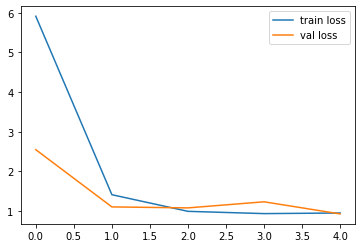

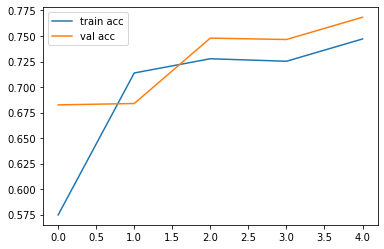

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

In [18]:
y_pred = model.predict(testing_set)
y_pred

array([[9.9878854e-01, 1.5925525e-05, 5.6661357e-04, 2.2937825e-09,
        6.2885263e-04],
       [6.0077105e-07, 1.5415475e-03, 9.9077445e-01, 2.7942048e-07,
        7.6831961e-03],
       [9.9988902e-01, 3.3545302e-07, 3.3666100e-05, 6.1689008e-11,
        7.6945114e-05],
       ...,
       [1.7938964e-02, 3.0891332e-01, 6.4574796e-01, 7.7770033e-05,
        2.7322032e-02],
       [9.9951315e-01, 6.0033667e-06, 4.5462119e-05, 3.8476600e-07,
        4.3504321e-04],
       [7.5758795e-11, 1.0225264e-05, 7.2766340e-01, 1.0132458e-04,
        2.7222502e-01]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 0, 4,
       0, 0, 2, 0, 0, 4, 0, 4, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 4, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 4, 0, 4, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 2, 0,
       0, 2, 0, 2, 4, 2, 0, 2, 2, 0, 4, 2, 0, 2, 2, 2, 0, 4, 0, 0, 2, 0,
       4, 0, 0, 0, 2, 2, 0, 4, 2, 0, 2, 2, 2, 0, 4, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 4, 0, 2, 0, 0, 2, 2, 2, 4, 2, 4, 2, 0, 0, 0, 2, 0, 4, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 4, 4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       4, 2, 4, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 4, 0, 0, 0,
       2, 0, 4, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 4, 2, 2, 2, 2, 0,

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [8]:
model=load_model('inception-diabetic.h5')

In [41]:
img=image.load_img(r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\testing\4\eadc57064154.png',target_size=(224,224))

In [42]:
x=image.img_to_array(img)

In [43]:
x.shape

(224, 224, 3)

In [44]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [45]:
model.predict(img_data)

array([[1.0327281e-04, 1.1295833e-05, 3.8819790e-01, 9.3927401e-06,
        6.1167812e-01]], dtype=float32)

In [46]:
a=np.argmax(model.predict(img_data), axis=1)

In [47]:
a==0,a==1,a==2,a==3,a==4

(array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([ True]))

In [48]:
index=['No Diabetic Retinopathy', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']
result = str(index[a[0]])
result

'Proliferative DR'